<font size="5">  From Linear to Logistic Regression</font> <br>

**Let's fit a simple linear regression model an interpret the slope.**

We would like to understand why simple linear regression is not a good substitute for logistic regression.

In [8]:
suppressWarnings(library(tidyverse))
suppressWarnings(library(magrittr))
suppressWarnings(library(dplyr))
library(ggplot2)

In [2]:
df = readr::read_csv("loan_dataset.csv", show_col_types = FALSE)
head(df)

Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Male,Yes,1,Graduate,No,4583,128,360,1,Rural,0
Male,Yes,0,Graduate,Yes,3000,66,360,1,Urban,1
Male,Yes,0,Not Graduate,No,2583,120,360,1,Urban,1
Male,No,0,Graduate,No,6000,141,360,1,Urban,1
Male,Yes,2,Graduate,Yes,5417,267,360,1,Urban,1
Male,Yes,0,Not Graduate,No,2333,95,360,1,Urban,1


In [3]:
lm_model <- lm(formula = Loan_Status ~ LoanAmount, data = df)
summary(lm_model)


Call:
lm(formula = Loan_Status ~ LoanAmount, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7476 -0.6716  0.2915  0.3068  0.4959 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.751299   0.043375  17.321   <2e-16 ***
LoanAmount  -0.000412   0.000262  -1.573    0.116    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4616 on 478 degrees of freedom
Multiple R-squared:  0.005148,	Adjusted R-squared:  0.003067 
F-statistic: 2.474 on 1 and 478 DF,  p-value: 0.1164


In the simple linear regression model for predicting Loan_Status based on the LoanAmount, the intercept is 0.751299 and the slope is -0.000412. <br>
**This means for each unit increase in the LoanAmount, Loan_Status will be decreased by 0.000412.** <br>
Linear Regression is not a suitable model for our binary target because we can see that the Loan_Status value can go above 1 or below 0 and we cannot interpret the output as a probability. <br>
For example when LoanAmount is 0, the Loan_Status is 0.751299, and when the LoanAmount is $20,000, the Loan_Status will be -7.488701. We can see that this number does not mean anything as a Loan_Status.

**Fit a simple logistic regression model and interpret the slope.**

In [4]:
#Convert target column to factors
df <- df %>% mutate(Loan_Status = as.factor(Loan_Status))

In [5]:
glm_model <- glm(formula = Loan_Status ~ LoanAmount, data = df, family = "binomial")
summary(glm_model)


Call:
glm(formula = Loan_Status ~ LoanAmount, family = "binomial", 
    data = df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.077944   0.201586   5.347 8.93e-08 ***
LoanAmount  -0.001840   0.001182  -1.556     0.12    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 593.05  on 479  degrees of freedom
Residual deviance: 590.67  on 478  degrees of freedom
AIC: 594.67

Number of Fisher Scoring iterations: 4


In the simple logistic regression model the intercept is 1.077944 and the slope is -0.001840. <br>
**This means for 1 unit increase in the LoanAmount, the log odds of Loan_Status being 1 (approved) decreases about 0.001840.**<br>
For example if LoanAmount is 0, the log odds of Loan_Status being 1 is 1.077944 and the probability of Loan_Status being 1 is about 0.0746.<br>
If the LoanAmount is 20,000, the probability of Loan_Status being 1 decreases to about 3.062726e-16.<br>
Intuitively having probability close to 0 for the LoanAmount as big as $20,000 does not make sense. This is because the only significant feature for my model is Credit_History and rest of the features are not very informative about the Loan_Status. I am researching to find a better dataset for my future assignments.

Visualizing the probability of LoanStatus being 1 using the coefficients from the glm model.

In [6]:
b_0 = 1.077944
b_1 = -0.001840

LoanStatus_prob = data.frame(LoanAmount = c(0, 1, 100, 300, 2000,  20000)) %>%
                            mutate(prob = 1/(1+exp(-(b_0 + b_1 * LoanAmount))))

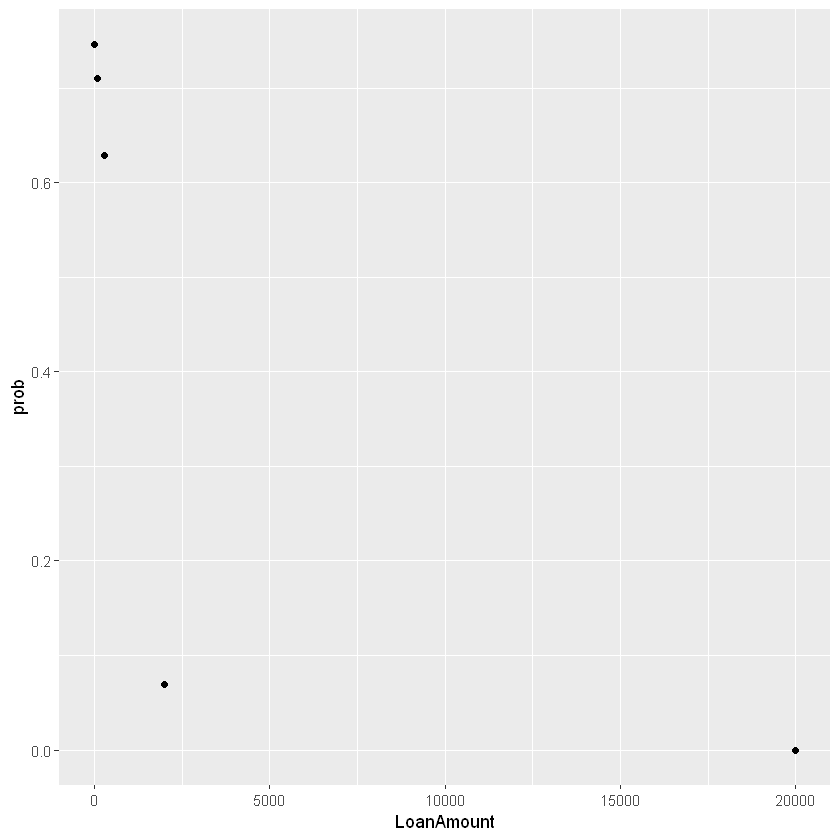

In [7]:
ggplot(LoanStatus_prob) +
aes(x = LoanAmount, y=prob) + 
geom_point()